In [17]:
# Load libraries
# Load the following libraries:  numpy, pandas, pandas_profiling, pyplot, stats
import numpy as np
import pandas as pd
# from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Read .csv into a dataframe called wells
wells = pd.read_csv("../data/enverus_data.csv", low_memory=False)

In [5]:
# Select this subset of features into wells_filtered:  "Vintage", "Trajectory","LateralLength_FT","TVD_FT","Formation","First12MonthOil_BBL","NearNeighborCount100dVZone","MonthsToPeakProduction","ProppantIntensity_LBSPerFT","ProppantLoading_LBSPerGAL","RawOperator","Section","Township","Range"
wells_filtered = wells[[ "Vintage", "Trajectory","LateralLength_FT","TVD_FT","Formation","First12MonthOil_BBL","NearNeighborCount100dVZone","MonthsToPeakProduction","ProppantIntensity_LBSPerFT","ProppantLoading_LBSPerGAL","RawOperator","Section","Township","Range"]].copy()

In [ ]:
# Execute profile on wells_filtered
profile = ProfileReport(wells_filtered, title="Pandas Profiling Report")
profile.to_file(output_file='output.html')

In [9]:
# Data cleaning - remove missing values
print(wells_filtered.isnull().sum())
wells_filtered.dropna(inplace=True)
print(wells_filtered.isnull().sum())

Vintage                       0
Trajectory                    0
LateralLength_FT              0
TVD_FT                        0
Formation                     0
First12MonthOil_BBL           0
NearNeighborCount100dVZone    0
MonthsToPeakProduction        0
ProppantIntensity_LBSPerFT    0
ProppantLoading_LBSPerGAL     0
RawOperator                   0
Section                       0
Township                      0
Range                         0
dtype: int64
Vintage                       0
Trajectory                    0
LateralLength_FT              0
TVD_FT                        0
Formation                     0
First12MonthOil_BBL           0
NearNeighborCount100dVZone    0
MonthsToPeakProduction        0
ProppantIntensity_LBSPerFT    0
ProppantLoading_LBSPerGAL     0
RawOperator                   0
Section                       0
Township                      0
Range                         0
dtype: int64


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdaa08d0670>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdaa08d0d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdaa08d0310>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdaa08e9430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdaa08e9790>],
 'means': []}

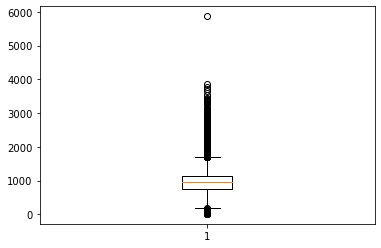

In [15]:
# Data cleaning - examine outliers
plt.boxplot(wells_filtered["ProppantIntensity_LBSPerFT"])

In [20]:
# Data cleaning - replace outliers
median = wells['ProppantIntensity_LBSPerFT'].median()
wells_filtered["zscore"] = np.abs(stats.zscore(wells_filtered["ProppantIntensity_LBSPerFT"]))
wells_filtered["ProppantIntensity_LBSPerFT"] = np.where(wells_filtered["zscore"] >=3, median,wells_filtered['ProppantIntensity_LBSPerFT'])



{'whiskers': [<matplotlib.lines.Line2D at 0x7fda987a3640>,
 'caps': [<matplotlib.lines.Line2D at 0x7fda987a3d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fda987a32e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdaa094d400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdaa094d760>],
 'means': []}

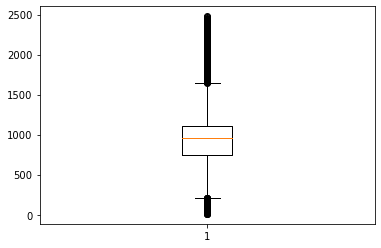

In [21]:
plt.boxplot(wells_filtered["ProppantIntensity_LBSPerFT"])

<AxesSubplot:>

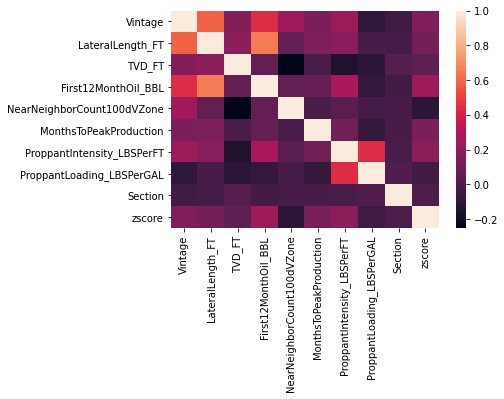

In [23]:
# Measuring correlation

# import seaborn
import seaborn as sns
# plot the correlations
sns.heatmap(wells_filtered.corr())

In [24]:
# Create dummy variables for Trajectory
trajectory_dummies = pd.get_dummies(wells_filtered["Trajectory"],prefix="dummy_trajectory_")
wells_final = pd.concat([wells_filtered,trajectory_dummies])

In [25]:
wells_final

,Vintage,Trajectory,LateralLength_FT,TVD_FT,Formation,First12MonthOil_BBL,NearNeighborCount100dVZone,MonthsToPeakProduction,ProppantIntensity_LBSPerFT,ProppantLoading_LBSPerGAL,RawOperator,Section,Township,Range,zscore,dummy_trajectory__HORIZONTAL
0,2012.0,HORIZONTAL,4734.0,7188.0,CODELL | NIOBRARA B2,412.0,0.0,1.0,528.0946,1.776406,KAISER FRANCIS OIL CO,33.0,015N,062W,0.995406,NaN
1,2017.0,HORIZONTAL,9779.0,8494.0,CODELL,64275.0,2.0,4.0,1060.5748,0.983050,KAISER FRANCIS OIL CO,31.0,016N,064W,0.094649,NaN
2,2018.0,HORIZONTAL,9402.0,8675.0,CODELL,81327.0,3.0,2.0,602.3277,1.460079,EOG RESOURCES INC,35.0,013N,065W,0.843441,NaN
4,2014.0,HORIZONTAL,8778.0,8064.0,CODELL,42012.0,0.0,3.0,686.2088,1.123258,KAISER FRANCIS OIL CO,9.0,015N,064W,0.671726,NaN
6,2018.0,HORIZONTAL,9356.0,8534.0,CODELL,40014.0,2.0,2.0,1198.3994,1.127336,KAISER FRANCIS OIL CO,31.0,016N,064W,0.376794,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
24651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
24655,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
24657,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [29]:
trajectory_dummies = pd.get_dummies(wells_filtered[["Trajectory"]])

In [30]:
wells_filtered.shape

(8336, 15)

In [31]:
trajectory_dummies.shape

(8336, 1)

In [33]:
wells_final = pd.concat([wells_filtered, trajectory_dummies], axis = 1)
wells_final

,Vintage,Trajectory,LateralLength_FT,TVD_FT,Formation,First12MonthOil_BBL,NearNeighborCount100dVZone,MonthsToPeakProduction,ProppantIntensity_LBSPerFT,ProppantLoading_LBSPerGAL,RawOperator,Section,Township,Range,zscore,Trajectory_HORIZONTAL
0,2012,HORIZONTAL,4734.0,7188.0,CODELL | NIOBRARA B2,412.0,0.0,1.0,528.0946,1.776406,KAISER FRANCIS OIL CO,33,015N,062W,0.995406,1
1,2017,HORIZONTAL,9779.0,8494.0,CODELL,64275.0,2.0,4.0,1060.5748,0.983050,KAISER FRANCIS OIL CO,31,016N,064W,0.094649,1
2,2018,HORIZONTAL,9402.0,8675.0,CODELL,81327.0,3.0,2.0,602.3277,1.460079,EOG RESOURCES INC,35,013N,065W,0.843441,1
4,2014,HORIZONTAL,8778.0,8064.0,CODELL,42012.0,0.0,3.0,686.2088,1.123258,KAISER FRANCIS OIL CO,9,015N,064W,0.671726,1
6,2018,HORIZONTAL,9356.0,8534.0,CODELL,40014.0,2.0,2.0,1198.3994,1.127336,KAISER FRANCIS OIL CO,31,016N,064W,0.376794,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24650,2016,HORIZONTAL,9252.0,7549.0,NIOBRARA,138221.0,11.0,4.0,1491.8362,1.269990,GREAT WESTERN OPERATING COMPANY LLC,34,001N,067W,0.977496,1
24651,2020,HORIZONTAL,7171.0,5576.0,NIOBRARA,47376.0,2.0,5.0,1634.5433,0.748317,WHITING OIL & GAS CORPORATION,30,010N,057W,1.269636,1
24655,2019,HORIZONTAL,9221.0,6278.0,NIOBRARA,87483.0,5.0,13.0,1504.6854,0.839485,VERDAD RESOURCES LLC,8,009N,059W,1.003800,1
24657,2018,HORIZONTAL,5933.0,7846.0,CODELL,59617.0,5.0,18.0,1078.0938,0.841345,PETROSHARE CORPORATION,3,001S,067W,0.130513,1
